    # Laboratorium 9

### 0. Wczytanie danych
Używając metody `load_svmlight_file` z modułu `sklearn` załaduj plik `lab13_files/breast_cancer`, który składa się z 2 elementów: macierzy `X` o wymiarach `683 x 10` oraz wektora `y` o dlugosci `683`. Macierz `X` opisuje badania 683 pacjentow, a wektor `y` ich diagnozy. 

In [1]:
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file('lab13_files/breast-cancer')
X = X.toarray()


### 1. Preprocessing
1.1 Korzystajac z `numpy.where` przenumeruj wektor y, tzn zamień wartości 2 i 4 na -1 i +1. 

1.2 Przeskaluj macierz X, tak żeby wartości w każdej kolumnie mieściły się w zakresie [0,1], innymi słowy przeskaluj niezależnie każdą kolumne $X_j$ wg wzoru:


$$
X_j = \frac{X_j-\min(X_j)}{\max(X_j)-\min(X_j)}
$$

In [8]:
import numpy as np

y = np.where(y == 2, -1, 1)

In [2]:
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X

array([[0.06994635, 0.44444444, 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       [0.07016441, 0.44444444, 0.33333333, ..., 0.22222222, 0.11111111,
        0.        ],
       [0.07109638, 0.22222222, 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       ...,
       [0.06164188, 0.44444444, 1.        , ..., 0.77777778, 1.        ,
        0.11111111],
       [0.06228791, 0.33333333, 0.77777778, ..., 1.        , 0.55555556,
        0.        ],
       [0.06228791, 0.33333333, 0.77777778, ..., 1.        , 0.33333333,
        0.        ]])

### 2. Wizualizacja
Narysuj dane używajac biblioteki `matplotlib`. Użyj wymiarów 1 i 2 z macierzy X, a jako kolory użyj wektora y. Pobaw sie parametrami "s" oraz "alpha" metody `plt.scatter` żeby uzyskać czytelną wizualizacje, np. taką jak poniżej.

<img src="lab13_files/d.png">

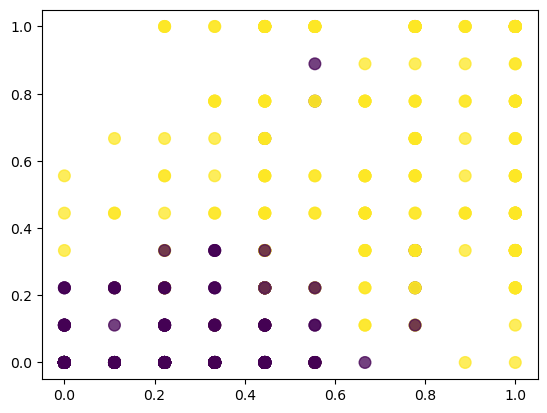

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 1], X[:, 2], s=70, c=y, alpha=0.75)

### 3. Regresja 

Przeprowadź regresje liniową wg wzoru:
$$
\beta = (X^TX)^{-1}X^Ty
$$

In [10]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([-6.99534089, -0.18099245,  0.98590886,  0.42019705,  0.10457698,
       -0.59830206,  0.85739125, -0.31840576,  0.47729336,  0.16637872])

### 4. Wizualizacja Regresji

Zwizualizuj dane po zrzutowaniu na $\beta$ używajac metody `plt.hist`, tzn. narysuj histogramy $\beta X_+$ oraz
$\beta X_-$ gdzie $X_+$ to wiersze $X$ dla których $y=+1$ i analogicznie $X_-$. Postaraj się wygenerować czytelny wykres podobny do tego poniżej.

<img src="lab13_files/lr1.png">

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


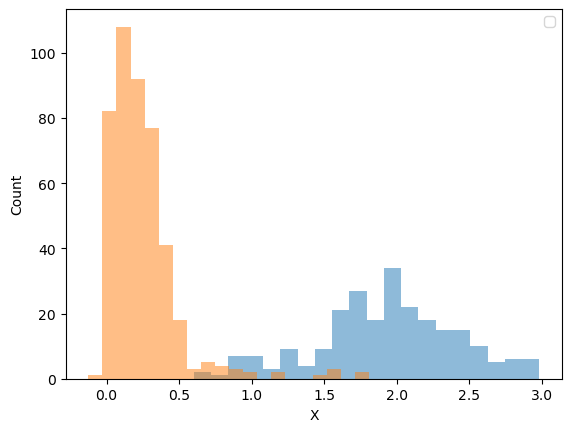

In [18]:


X_extended = np.column_stack([np.ones(X.shape[0]), X])
b = np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ y
y_pred = X_extended @ b

X_plus = X[y == 1]
X_minus = X[y == -1]

bX_plus = X_plus @ b[1:]  
bX_minus = X_minus @ b[1:] 

plt.hist(bX_plus, alpha=0.5, bins=20)
plt.hist(bX_minus, alpha=0.5, bins=20)

plt.legend()
plt.xlabel('X')
plt.ylabel('Count')
 
plt.show()

### 5. Klasyfikacja

Przeprowadź "klasyfikacje" naszych pacjentów, ci, którzy zostali zrzutowani na wartość ujemną dostają etykiete $-1$, a ci którzy na wartość dodatnia - etykiete $+1$

In [20]:
y_pred = np.where(beta @ X.T < 0, -1, 1)
y_pred

array([-1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
        1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
       -1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,
        1, -1,  1,  1,  1

### 6. Ewaluacja

Policz jak dokładny jest ten model, tzn. jak duży jest zbiór
$ \{ (x_i,y_i) : \mathrm{sign}(\beta x_i) = y_i \} $
w stosunku do rozmiaru całego $y$

Powinno udać się uzyskać wynik na poziomie 93-94%

In [11]:
len([(X[a], y[a]) for a in range(len(y)) if np.sign(X[a] @beta) == np.sign(y[a])])/len(y)

0.9487554904831625

### 7. Regularyzacja 
Dodaj parametr `C` do regresji liniowej
$$
\beta = (X^TX + \tfrac{1}{C}I)^{-1}X^Ty
$$

gdzie $I$ - macierz identyczności. 

Dla jakiej wartości `C` wynik jest najlepszy? Jaki wynik udało Ci sie uzyskać?

In [26]:
C=0.001
b_C = np.linalg.inv(X_extended.T @ X_extended + 1/C*np.identity(11)) @ X_extended.T @ y

y_pred = X_extended @ b_C
y_pred_class = np.where(y_pred > 0, 1, -1)
accuracy = np.sum(y_pred_class == y) / len(y)
accuracy

0.9677891654465594

### 8. Gratulacje
Właśnie stworzyłeś/-aś swój pierwszy klasyfikator (statystyczny model predykcji). 

Spróbuj zastosować go do innych danych.

### Zadanie dodatkowe

Zaimplementuj powyższą metode jako klase `LRClassifier` wyposażoną w następujące metody:

* konstruktor przyjmujący dwa parametry: 
    * `C` - stała z równania 
    * `scale` - zmienna boolowska (domyslnie `True`) która określa czy macierz `X` ma byc automatycznie znormalizowana (przeskalowana do `[0,1]`)
* `.fit(X, y)` która spowoduje obliczenie $\beta$, dla `X` - dowolnej macierzy, `y` - wektora etykiet skladajacego sie z dwóch unikalnych wartosci (mogą to byc np. 2 różne stringi)
* `.predict(X)`, która zwróci wektor zawierajacy na `i`tej pozycji etykiete "przewidzianą" przez nasz model (pamiętaj o skalowaniu jesli `scale==True`!)

Przykladowe użycie:

    clf = LRClassifier(C=100)
    Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
    yt = np.array(['x', 'x', 'y', 'y', 'y'])
    clf.fit(Xt, yt)
    X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
    print(clf.predict(X)) # ['x', 'x', 'y']

In [30]:
import numpy as np

class LRClassifier:
    def __init__(self, C, scale=True):
        self.C = C
        self.scale = scale
        self.theta = None
        
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _normalize(self, X):
        mins = np.min(X, axis=0)
        maxs = np.max(X, axis=0)
        return (X - mins) / (maxs - mins)
    
    def fit(self, X, y):
        if self.scale:
            X = self._normalize(X)
        
        m, n = X.shape
        X = np.insert(X, 0, 1, axis=1)
        
        unique_classes = np.unique(y)
        if len(unique_classes) != 2:
            raise ValueError("LRClassifier supports binary classification only.")
        
        y = np.where(y == unique_classes[0], 0, 1)
        
        self.theta = np.zeros(n + 1)
        
        for _ in range(self.C):
            h = self._sigmoid(np.dot(X, self.theta))
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= gradient
        
    def predict(self, X):
        if self.scale:
            X = self._normalize(X)
        
        X = np.insert(X, 0, 1, axis=1)
        predictions = []
        
        for row in X:
            prediction = 'Fail' if self._sigmoid(np.dot(row, self.theta)) < 0.5 else 'Pass'
            predictions.append(prediction)
        
        return np.array(predictions)
    
#

clf = LRClassifier(C=200, scale=True)


X_train = np.array([[89, 92], [72, 88], [78, 90], [95, 95], [84, 91]])
y_train = np.array(['Pass', 'Fail', 'Fail', 'Pass', 'Pass'])

clf.fit(X_train, y_train)

X_test = np.array([[90, 91], [75, 89], [80, 93]])
predictions = clf.predict(X_test)
print(predictions) 

['Pass' 'Fail' 'Pass']
